In [80]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [81]:
# Training data
app_train = pd.read_csv('dseb63_application_train.csv')
app_train = app_train.drop(app_train.columns[0], axis=1)
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (246009, 122)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [82]:
# Testing data features
app_test = pd.read_csv('dseb63_application_test.csv')
app_test = app_test.drop(app_test.columns[0], axis=1)
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (61502, 121)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,25672


Repaid: 226133
Not repaid: 19876
Repaid: 91.92 %
Not repaid: 8.08 %


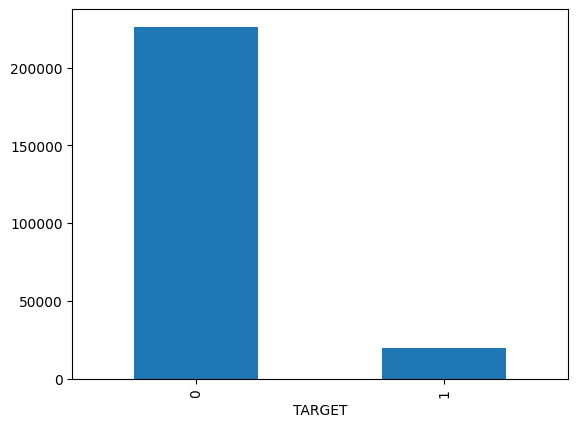

In [83]:
app_train['TARGET'].value_counts().plot.bar()
n_group = app_train['TARGET'].value_counts()
n_group_sum = n_group.sum()

print('Repaid: {}'.format(n_group[0]))
print('Not repaid: {}'.format(n_group[1]))

print('Repaid: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('Not repaid: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

In [84]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No fields: ', dataset.shape[0])
    print('No missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'Number mising Value', 1:'Percentage missing Value'})
    return n_miss_tbl

summary_missing(app_train)

No fields:  246009
No missing fields:  64


,Number mising Value,Percentage missing Value
COMMONAREA_MODE,171930,69.9
COMMONAREA_AVG,171930,69.9
COMMONAREA_MEDI,171930,69.9
NONLIVINGAPARTMENTS_MEDI,170869,69.5
NONLIVINGAPARTMENTS_AVG,170869,69.5
...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,805,0.3
DEF_60_CNT_SOCIAL_CIRCLE,805,0.3
OBS_60_CNT_SOCIAL_CIRCLE,805,0.3
EXT_SOURCE_2,529,0.2


In [85]:
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(app_train)
table_dtype

,Data Type
TARGET,int64
REG_REGION_NOT_LIVE_REGION,int64
REG_REGION_NOT_WORK_REGION,int64
LIVE_REGION_NOT_WORK_REGION,int64
REG_CITY_NOT_LIVE_CITY,int64
...,...
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
FLAG_OWN_CAR,object


In [86]:
table_dtype['Data Type'].value_counts()

Data Type
float64    65
int64      41
object     16
Name: count, dtype: int64

In [87]:
# Các dòng dữ liệu dạng object
app_train.select_dtypes('object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
2,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
3,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
4,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN


In [88]:
app_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

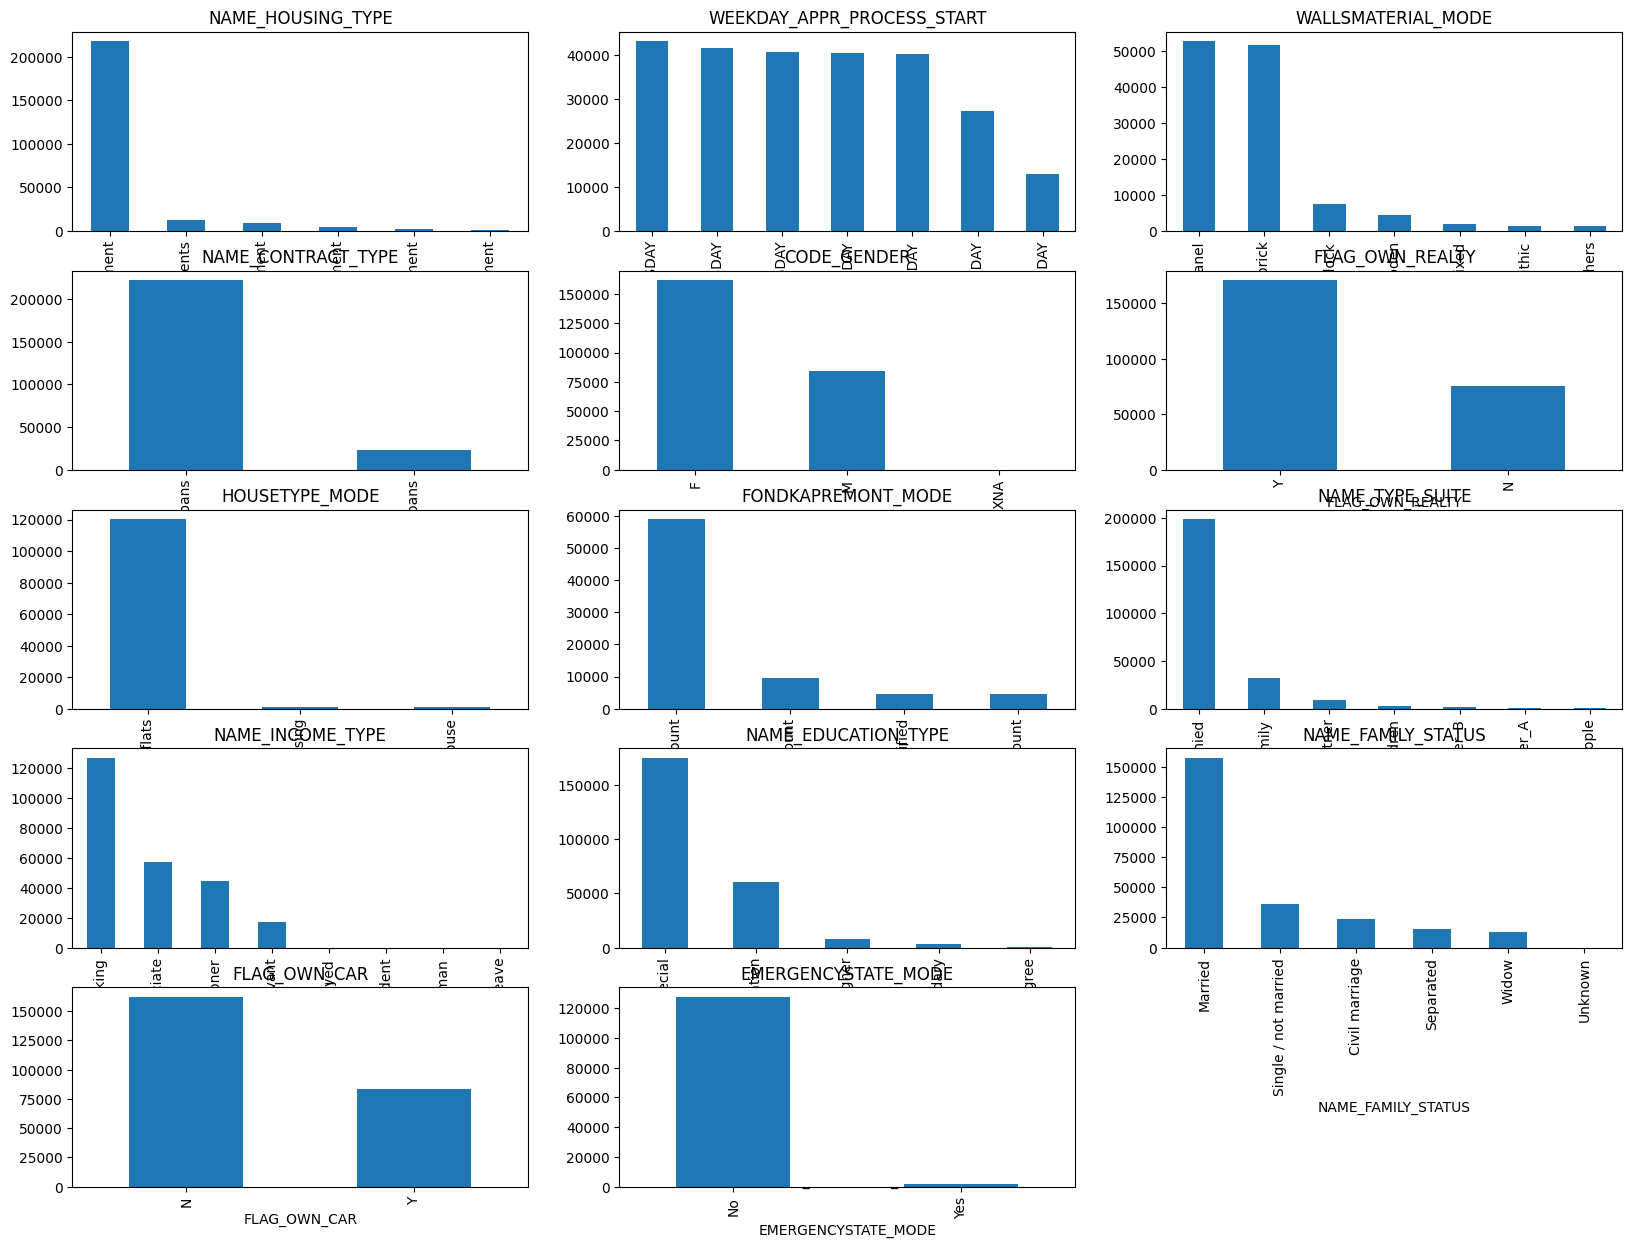

In [89]:
dtypes_object = table_dtype[table_dtype['Data Type'] == 'object'].index.tolist()
dtypes_object = [col for col in dtypes_object if col not in ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']]


def _plot_bar_classes(cols):
    app_train[cols].value_counts().plot.bar()

plt.figure(figsize = (20, 15))    
for i in range(1, 15, 1):
    plt.subplot(5, 3, i)
    _plot_bar_classes(dtypes_object[i-1])
    plt.title(dtypes_object[i-1])

In [90]:
def _per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    print(per_categorical)
    print('-------------------------------------\n')
    return per_categorical

for col in dtypes_object:
    _per_categorical(col)

NAME_HOUSING_TYPE
Rented apartment        7.279070
With parents            7.603198
Municipal apartment    10.948787
Co-op apartment        11.256757
House / apartment      11.792233
Office apartment       14.057554
dtype: float64
-------------------------------------

WEEKDAY_APPR_PROCESS_START
TUESDAY      11.013370
FRIDAY       11.166062
WEDNESDAY    11.288462
THURSDAY     11.318361
SUNDAY       11.730693
SATURDAY     11.775270
MONDAY       11.785669
dtype: float64
-------------------------------------

WALLSMATERIAL_MODE
Wooden           9.055944
Others          10.385965
Mixed           12.035211
Stone, brick    12.577398
Block           13.174330
Panel           14.666074
Monolithic      19.753623
dtype: float64
-------------------------------------

NAME_CONTRACT_TYPE
Cash loans         10.961239
Revolving loans    17.445490
dtype: float64
-------------------------------------

CODE_GENDER
M       8.851323
F      13.280572
XNA          NaN
dtype: float64
------------------------

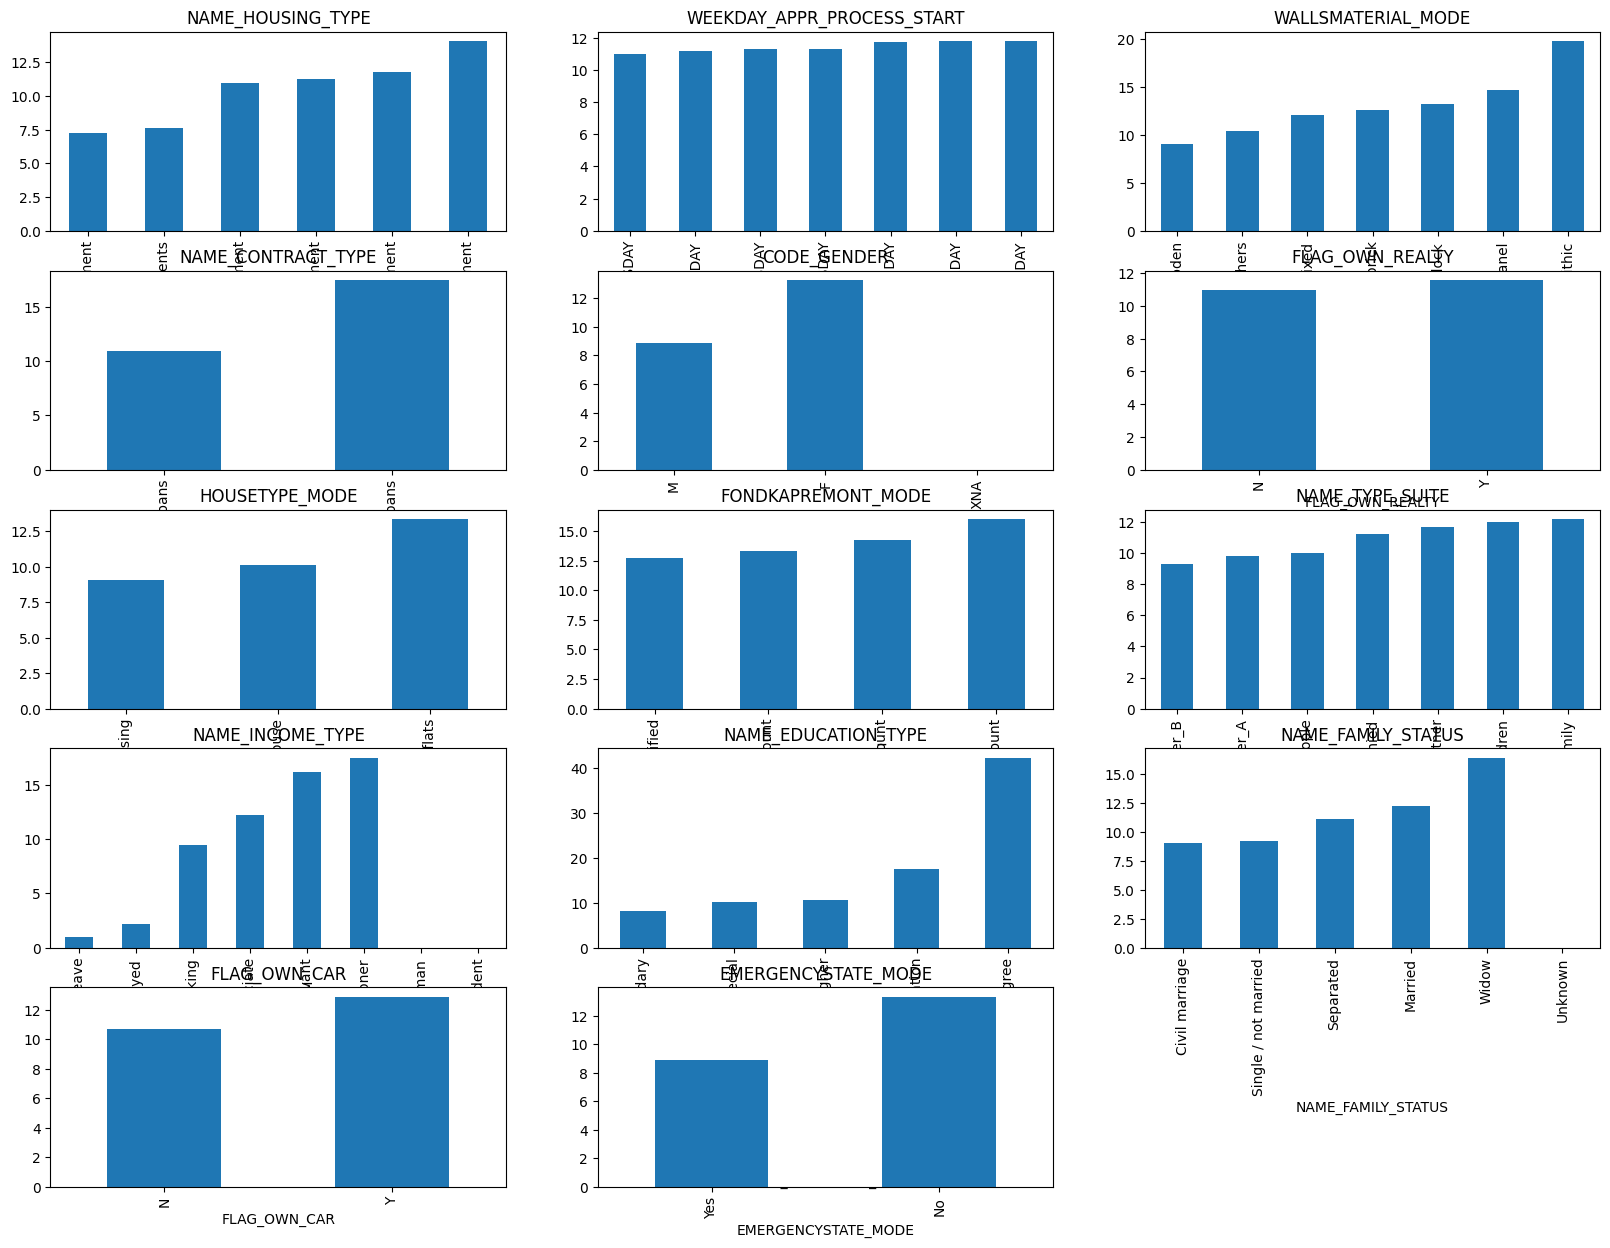

In [91]:
def _plot_per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    per_categorical.plot.bar()
    plt.title(col)
    return per_categorical

plt.figure(figsize = (20, 15))
i = 0
for col in dtypes_object:
    i += 1
    plt.subplot(5, 3, i)
    _plot_per_categorical(col)

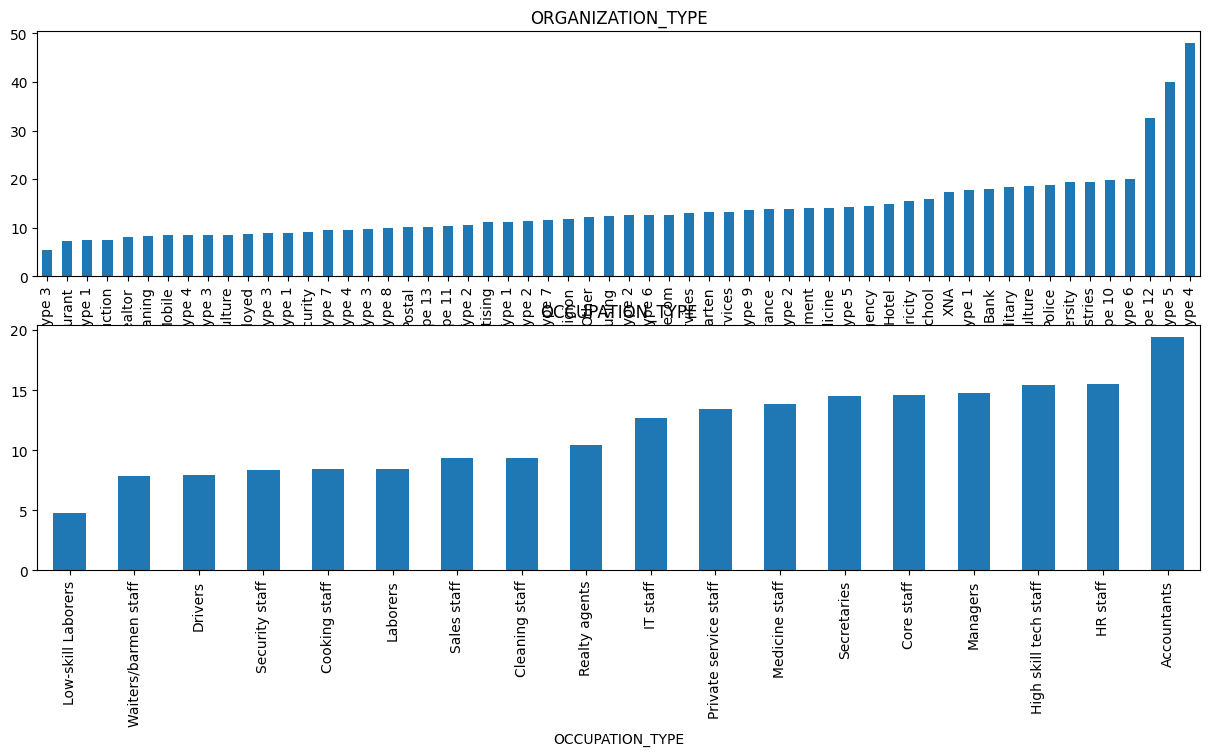

In [92]:
plt.figure(figsize = (15, 7))
i = 0
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)

In [93]:
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    _per_categorical(col)

ORGANIZATION_TYPE
Transport: type 3          5.378378
Restaurant                 7.202247
Industry: type 1           7.505155
Construction               7.528302
Realtor                    8.085714
Cleaning                   8.318182
Mobile                     8.481481
Industry: type 4           8.520000
Industry: type 3           8.549451
Agriculture                8.558252
Self-employed              8.820857
Trade: type 3              8.918149
Trade: type 1              9.000000
Security                   9.189723
Trade: type 7              9.601019
Transport: type 4          9.626536
Business Entity Type 3     9.706091
Industry: type 8          10.000000
Postal                    10.090909
Industry: type 13         10.200000
Industry: type 11         10.395833
Business Entity Type 2    10.486450
Advertising               11.107143
Business Entity Type 1    11.189873
Industry: type 2          11.433333
Industry: type 7          11.716049
Religion                  11.800000
Other     

In [94]:
# Nhóm các giá trị rate gần bằng nhau vào 1 nhóm theo schedule_div.
def _devide_group(col, schedule_div = None, n_groups = 3, *kwargs):
    cols = []
    tbl_per_cat = _per_categorical(col)
    
    if schedule_div is None:
        n_cats = len(tbl_per_cat)
        n_val_incat = int(n_cats/n_groups)
        n_odd = n_cats - n_groups*n_val_incat

        for i in range(n_groups):
            if i == n_groups - 1:
                el = tbl_per_cat[(n_val_incat*i):(n_val_incat*(i+1)+n_odd)].index.tolist()
            else:
                el = tbl_per_cat[(n_val_incat*i):n_val_incat*(i+1)].index.tolist()    
            cols.append(el)
    else:
        idx = 0
        for n_cols in schedule_div:
            el_cols = tbl_per_cat[idx:(idx+n_cols)].index.tolist()
            cols.append(el_cols)
            idx += n_cols
                
    return cols

cols_OCCUPATION_TYPE = _devide_group(col = 'OCCUPATION_TYPE', schedule_div = [1, 7, 9, 1])
cols_OCCUPATION_TYPE

OCCUPATION_TYPE
Low-skill Laborers        4.814035
Waiters/barmen staff      7.851240
Drivers                   7.972875
Security staff            8.364111
Cooking staff             8.432596
Laborers                  8.459020
Sales staff               9.394320
Cleaning staff            9.396648
Realty agents            10.461538
IT staff                 12.700000
Private service staff    13.486301
Medicine staff           13.851852
Secretaries              14.573529
Core staff               14.621545
Managers                 14.820276
High skill tech staff    15.422182
HR staff                 15.555556
Accountants              19.437500
dtype: float64
-------------------------------------



[['Low-skill Laborers'],
 ['Waiters/barmen staff',
  'Drivers',
  'Security staff',
  'Cooking staff',
  'Laborers',
  'Sales staff',
  'Cleaning staff'],
 ['Realty agents',
  'IT staff',
  'Private service staff',
  'Medicine staff',
  'Secretaries',
  'Core staff',
  'Managers',
  'High skill tech staff',
  'HR staff'],
 ['Accountants']]

In [95]:
cols_ORGANIZATION_TYPE = _devide_group(col = 'ORGANIZATION_TYPE')
cols_ORGANIZATION_TYPE

ORGANIZATION_TYPE
Transport: type 3          5.378378
Restaurant                 7.202247
Industry: type 1           7.505155
Construction               7.528302
Realtor                    8.085714
Cleaning                   8.318182
Mobile                     8.481481
Industry: type 4           8.520000
Industry: type 3           8.549451
Agriculture                8.558252
Self-employed              8.820857
Trade: type 3              8.918149
Trade: type 1              9.000000
Security                   9.189723
Trade: type 7              9.601019
Transport: type 4          9.626536
Business Entity Type 3     9.706091
Industry: type 8          10.000000
Postal                    10.090909
Industry: type 13         10.200000
Industry: type 11         10.395833
Business Entity Type 2    10.486450
Advertising               11.107143
Business Entity Type 1    11.189873
Industry: type 2          11.433333
Industry: type 7          11.716049
Religion                  11.800000
Other     

[['Transport: type 3',
  'Restaurant',
  'Industry: type 1',
  'Construction',
  'Realtor',
  'Cleaning',
  'Mobile',
  'Industry: type 4',
  'Industry: type 3',
  'Agriculture',
  'Self-employed',
  'Trade: type 3',
  'Trade: type 1',
  'Security',
  'Trade: type 7',
  'Transport: type 4',
  'Business Entity Type 3',
  'Industry: type 8',
  'Postal'],
 ['Industry: type 13',
  'Industry: type 11',
  'Business Entity Type 2',
  'Advertising',
  'Business Entity Type 1',
  'Industry: type 2',
  'Industry: type 7',
  'Religion',
  'Other',
  'Housing',
  'Transport: type 2',
  'Industry: type 6',
  'Telecom',
  'Services',
  'Kindergarten',
  'Legal Services',
  'Industry: type 9',
  'Insurance',
  'Trade: type 2'],
 ['Government',
  'Medicine',
  'Industry: type 5',
  'Emergency',
  'Hotel',
  'Electricity',
  'School',
  'XNA',
  'Transport: type 1',
  'Bank',
  'Military',
  'Culture',
  'Police',
  'University',
  'Security Ministries',
  'Industry: type 10',
  'Trade: type 6',
  'Ind

In [96]:
def _map_lambda_cats(cols_list, colname, x): 
    cats = list(map(lambda x:colname + '_' + str(x), np.arange(len(cols_list)).tolist()))
    for i in range(len(cols_ORGANIZATION_TYPE)):
        if x in cols_list[i]:
            return cats[i]
        
def _map_cats(cols_list, colname, dataset):                    
    return list(map(lambda x: _map_lambda_cats(cols_list, colname, x), 
                    dataset[colname]))

app_train['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_train)
pd.Series.unique(app_train['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_2', 'ORGANIZATION_TYPE_0',
       'ORGANIZATION_TYPE_1'], dtype=object)

In [97]:
app_test['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_test)
pd.Series.unique(app_test['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_0', 'ORGANIZATION_TYPE_2',
       'ORGANIZATION_TYPE_1'], dtype=object)

In [98]:
app_train['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_train)
app_test['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_test)

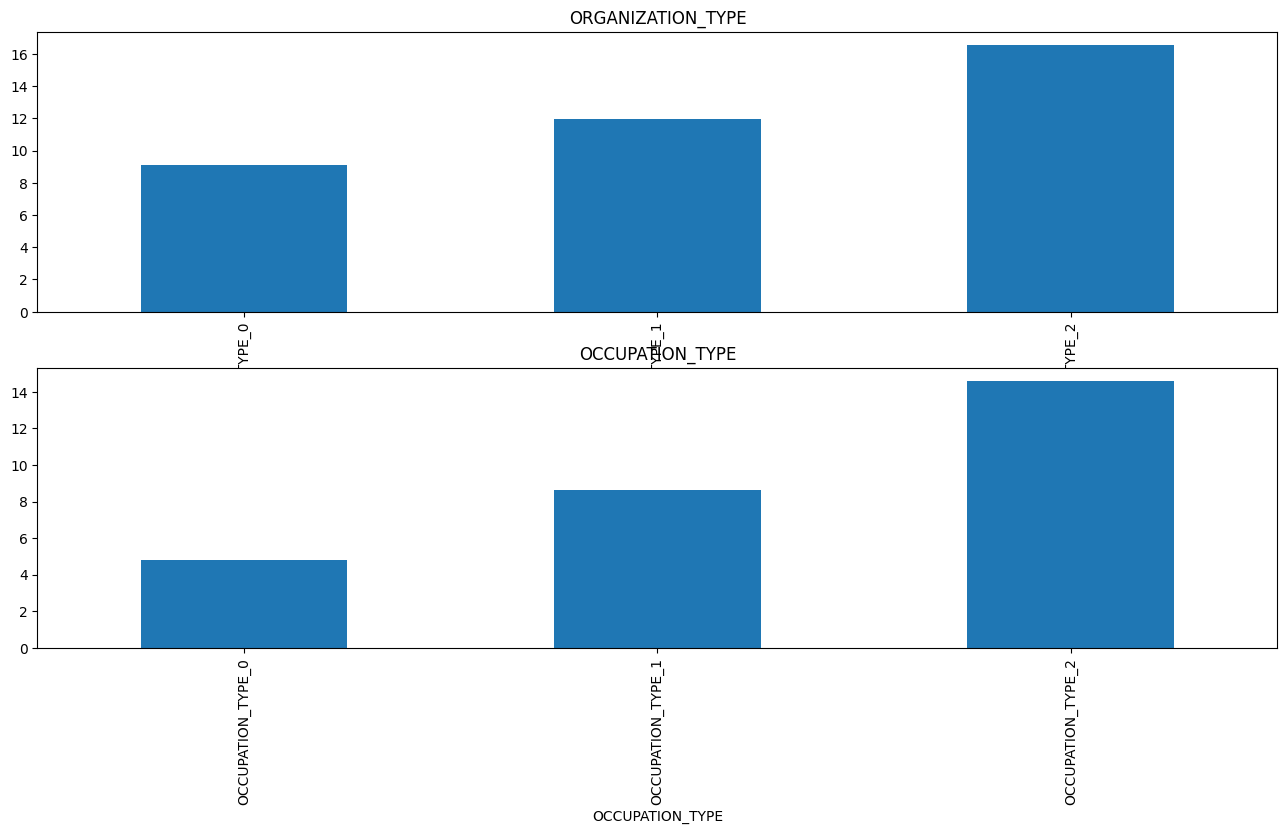

In [99]:
i = 0
plt.figure(figsize = (16, 8))
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)

In [100]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [101]:
print('app_train shape: ', app_train.shape)
print('app_test shape: ', app_test.shape)

app_train shape:  (246009, 176)
app_test shape:  (61502, 175)


In [102]:
for fea_name in app_train.columns:
    if fea_name not in app_test.columns:
        print(fea_name)

TARGET


In [103]:
TARGET = app_train['TARGET']

# Lệnh align theo axis = 1 sẽ lấy những trường xuất hiện đồng thời trong app_train và app_test
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
# Sau lệnh align biến TARGET bị mất, do đó ta cần gán lại biến này
app_train['TARGET'] = TARGET

print('app_train shape: ', app_train.shape)
print('app_test shape: ', app_test.shape)

app_train shape:  (246009, 176)
app_test shape:  (61502, 175)


In [104]:
app_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,True,False,False,False,False,False,False,True,False,0
1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,False,False,False,False,False,False,False,False,False,0
2,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,False,False,False,False,False,False,False,False,False,0
3,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,...,False,False,False,False,False,False,False,False,False,0
4,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,-2379,...,False,False,False,False,False,False,False,False,False,0


<Axes: >

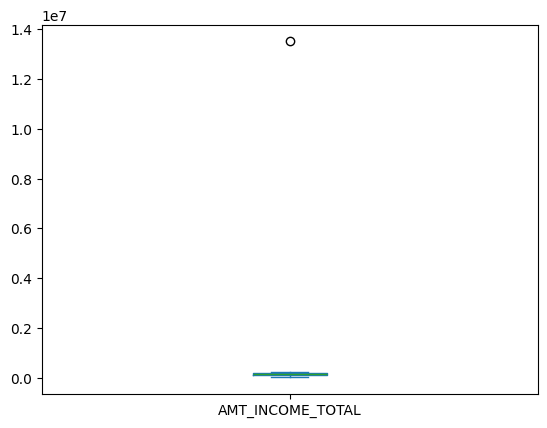

In [105]:
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

In [106]:
app_train['AMT_INCOME_TOTAL'].describe()

count    2.460090e+05
mean     1.684589e+05
std      1.045297e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.350000e+07
Name: AMT_INCOME_TOTAL, dtype: float64

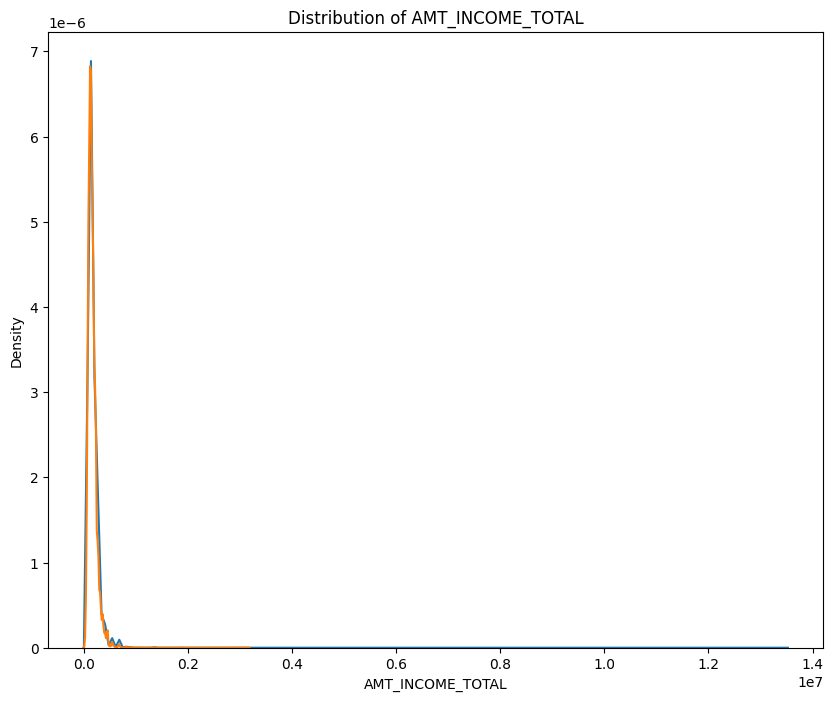

In [107]:
def _plot_density(colname):
    plt.figure(figsize = (10, 8))
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 0], label = 'Target = 0')
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 1], label = 'Target = 1')
    plt.xlabel(colname)
    plt.ylabel('Density')
    plt.title('Distribution of %s'%colname)

_plot_density('AMT_INCOME_TOTAL')

In [108]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Tên cột dữ liệu
    dataset: Bảng dữ liệu gốc sử dụng để tính khoảng 3 sigma
    dataset_apl: Bảng dữ liệu mới áp dụng khoảng 3 sigma được lấy từ dataset.
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Kiểm tra với biến FLAG_MOBIL
x = _zoom_3sigma('FLAG_MOBIL', app_train, app_train)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 0.99
High value: 1.01


In [109]:
app_train.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [110]:
# Thống kê các giá trị khác biệt trong toàn bộ các biến.
def _count_unique(x):
    return pd.Series.nunique(x)

tbl_dis_val = app_train.apply(_count_unique).sort_values(ascending = False)
tbl_dis_val[tbl_dis_val > 500]

SK_ID_CURR                246009
EXT_SOURCE_2              108873
EXT_SOURCE_1               94619
DAYS_BIRTH                 17418
DAYS_REGISTRATION          15367
AMT_ANNUITY                13150
DAYS_EMPLOYED              12078
DAYS_ID_PUBLISH             6140
AMT_CREDIT                  5267
LIVINGAREA_MODE             5154
LIVINGAREA_MEDI             5146
LIVINGAREA_AVG              5064
TOTALAREA_MODE              4994
BASEMENTAREA_MODE           3748
DAYS_LAST_PHONE_CHANGE      3737
BASEMENTAREA_AVG            3692
BASEMENTAREA_MEDI           3682
LANDAREA_MODE               3463
LANDAREA_MEDI               3454
LANDAREA_AVG                3415
NONLIVINGAREA_MODE          3173
NONLIVINGAREA_MEDI          3173
NONLIVINGAREA_AVG           3146
COMMONAREA_MEDI             3058
COMMONAREA_AVG              3032
COMMONAREA_MODE             2988
APARTMENTS_AVG              2257
AMT_INCOME_TOTAL            2185
LIVINGAPARTMENTS_AVG        1801
APARTMENTS_MEDI             1123
LIVINGAPAR

In [111]:
cols_3sigma = tbl_dis_val[tbl_dis_val > 500].index.tolist()
# Loại bỏ biến key là SK_ID_CURR ra khỏi danh sách:
cols_3sigma = cols_3sigma[1:]

In [112]:
# Loại bỏ các outlier bằng 3 sigma
for col in cols_3sigma:
    print(col)
    app_train[col] = _zoom_3sigma(col, app_train, app_train) 
    print('------------------------\n')

EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.06
High value: 1.09
------------------------

EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.13
High value: 1.13
------------------------

DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -29122.74
High value: -2955.15
------------------------

DAYS_REGISTRATION
Percentage of low: 0.24%
Percentage of high: 0.00%
Low value: -15549.40
High value: 5578.95
------------------------

AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 0.96%
Low value: -16411.67
High value: 70652.14
------------------------

DAYS_EMPLOYED
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -360066.52
High value: 487771.74
------------------------

DAYS_ID_PUBLISH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -7520.22
High value: 1534.27
------------------------

AMT_CREDIT
Percentage of low: 0.00%
Percentage of high: 1.06%
Low value: -609653.15
Hig

In [113]:
for col in cols_3sigma:
    print(col)
    app_test[col] = _zoom_3sigma(col, app_train, app_test) 
    print('------------------------\n')

EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.06
High value: 1.09
------------------------

EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.13
High value: 1.13
------------------------

DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -29122.74
High value: -2955.15
------------------------

DAYS_REGISTRATION
Percentage of low: 0.29%
Percentage of high: 0.00%
Low value: -15517.91
High value: 5553.11
------------------------

AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 1.27%
Low value: -14175.96
High value: 68079.16
------------------------

DAYS_EMPLOYED
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -360066.52
High value: 487771.74
------------------------

DAYS_ID_PUBLISH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -7520.22
High value: 1534.27
------------------------

AMT_CREDIT
Percentage of low: 0.00%
Percentage of high: 1.36%
Low value: -575886.88
Hig

<Axes: >

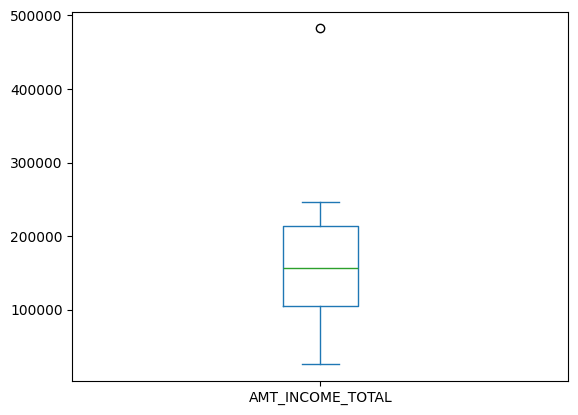

In [114]:
# Kiểm tra lại biến AMT_INCOME_TOTAL sau khi loại bỏ outlier
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

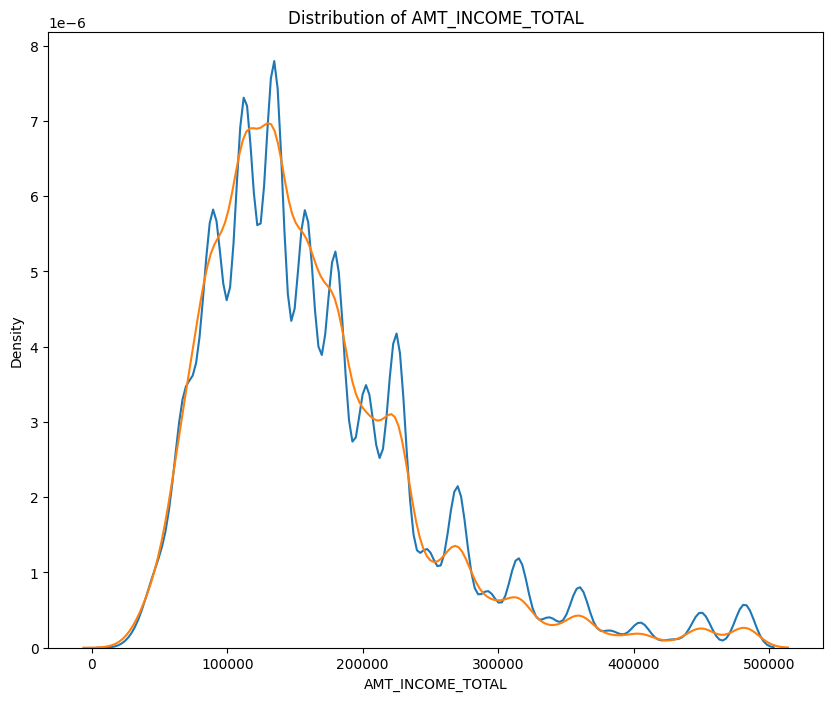

In [115]:
_plot_density('AMT_INCOME_TOTAL')

In [116]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer  # Thay thế Imputer bằng SimpleImputer

# Nếu có cột 'TARGET' trong app_train, tách ra khỏi dữ liệu
if 'TARGET' in app_train.columns:
    TARGET = app_train.pop('TARGET')

# Gán train và test vào app_train và app_test
train = app_train.copy()
test = app_test.copy()

train = train.drop(columns=['SK_ID_CURR'])
test = test.drop(columns=['SK_ID_CURR'])

# Khởi tạo SimpleImputer để điền giá trị thiếu bằng trung bình
imputer = SimpleImputer(strategy='mean')
imputer.fit(train)

# Điền các giá trị NA trong train và test
train = imputer.transform(train)
test = imputer.transform(test)

# Khởi tạo MinMaxScaler trong khoảng [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train)

# Scale dữ liệu trên train và test
train = scaler.transform(train)
test = scaler.transform(test)


In [117]:
# In kích thước của train và test
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (246009, 174)
test shape:  (61502, 174)


In [118]:
app_train['TARGET'] = TARGET
corr_tbl = app_train.corr()
corr_tbl

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
CNT_CHILDREN,1.000000,0.030122,0.002860,0.021860,-0.000976,-0.026915,0.331834,-0.240402,0.184032,-0.029352,...,-0.004282,-0.000747,0.002221,-0.001578,-0.020313,-0.024930,0.009643,-0.037982,0.004287,0.019643
AMT_INCOME_TOTAL,0.030122,1.000000,0.407374,0.485101,0.413268,0.194025,0.072139,-0.172370,0.076239,0.026253,...,0.032345,0.016614,0.058928,0.011271,0.090988,0.036316,-0.008527,0.131235,-0.007654,-0.022582
AMT_CREDIT,0.002860,0.407374,1.000000,0.787637,0.986935,0.095982,-0.056617,-0.067958,0.009313,-0.006661,...,0.014779,0.008149,0.027211,0.007128,0.046517,0.007912,-0.007443,0.056925,-0.004332,-0.031094
AMT_ANNUITY,0.021860,0.485101,0.787637,1.000000,0.791099,0.115969,0.011133,-0.109611,0.040468,0.013342,...,0.015575,0.010228,0.034838,0.006950,0.055546,0.006740,-0.007428,0.066578,-0.004205,-0.010791
AMT_GOODS_PRICE,-0.000976,0.413268,0.986935,0.791099,1.000000,0.100284,-0.054716,-0.066454,0.011223,-0.009441,...,0.013909,0.009847,0.028005,0.007519,0.049826,0.010909,-0.009224,0.061495,-0.005090,-0.040434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WALLSMATERIAL_MODE_Stone, brick",-0.024930,0.036316,0.007912,0.006740,0.010909,0.009935,-0.011148,-0.006495,-0.021925,-0.006240,...,-0.090790,-0.044892,-0.039451,-0.037550,-0.269763,1.000000,-0.068882,0.490606,-0.006691,-0.013512
WALLSMATERIAL_MODE_Wooden,0.009643,-0.008527,-0.007443,-0.007428,-0.009224,-0.056586,0.007277,-0.000580,-0.000865,0.011481,...,-0.023526,-0.011633,-0.010223,-0.009730,-0.069902,-0.068882,1.000000,0.079538,0.271118,0.009143
EMERGENCYSTATE_MODE_No,-0.037982,0.131235,0.056925,0.066578,0.061495,0.103032,-0.019363,-0.011285,-0.068613,-0.015682,...,0.165718,0.077117,0.073490,0.059922,0.503598,0.490606,0.079538,1.000000,-0.091047,-0.041818
EMERGENCYSTATE_MODE_Yes,0.004287,-0.007654,-0.004332,-0.004205,-0.005090,-0.029997,0.004322,-0.004939,-0.007454,0.005386,...,0.008292,0.031754,-0.004881,0.052834,-0.039593,-0.006691,0.271118,-0.091047,1.000000,0.006481


In [119]:
corr_tbl['TARGET'].sort_values()

EXT_SOURCE_3                            -0.180096
EXT_SOURCE_2                            -0.158824
EXT_SOURCE_1                            -0.154135
ORGANIZATION_TYPE_ORGANIZATION_TYPE_2   -0.061340
NAME_EDUCATION_TYPE_Higher education    -0.055888
                                           ...   
REGION_RATING_CLIENT_W_CITY              0.060598
ORGANIZATION_TYPE_ORGANIZATION_TYPE_0    0.062771
OCCUPATION_TYPE_OCCUPATION_TYPE_1        0.069976
DAYS_BIRTH                               0.077633
TARGET                                   1.000000
Name: TARGET, Length: 176, dtype: float64

In [120]:
pd_train = pd.DataFrame(train, columns = app_train.columns[1:-1])
pd_train['TARGET'] = TARGET
pd_train.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,-1.0,0.070776,0.415588,-0.012611,0.353940,-0.909967,-0.045772,-0.912704,0.847454,0.919133,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0
1,-1.0,-0.520813,-0.696494,-0.186780,-0.681097,-0.785954,-0.298309,-0.922366,-0.264744,0.322773,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,-1.0,-0.579972,-0.469368,-0.413355,-0.412547,-0.214240,-0.402818,-0.922360,0.445509,0.039044,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
3,-1.0,-0.678570,-0.494884,-0.249616,-0.485279,-0.016810,-0.065614,-0.914792,0.360747,0.867445,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,-1.0,0.465169,0.683735,0.172117,0.851876,-0.921571,-0.280834,-0.908846,0.408723,0.338891,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [121]:
corr_tbl_train = pd_train.corr()
corr_tbl_train

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
AMT_INCOME_TOTAL,1.000000,0.030122,0.002860,0.021860,-0.000975,-0.026915,0.331834,-0.240402,0.184032,-0.029352,...,-0.004282,-0.000747,0.002221,-0.001578,-0.020313,-0.024930,0.009643,-0.037982,0.004287,0.019643
AMT_CREDIT,0.030122,1.000000,0.407374,0.485096,0.413092,0.194025,0.072139,-0.172370,0.076239,0.026253,...,0.032345,0.016614,0.058928,0.011271,0.090988,0.036316,-0.008527,0.131235,-0.007654,-0.022582
AMT_ANNUITY,0.002860,0.407374,1.000000,0.787621,0.986534,0.095982,-0.056617,-0.067958,0.009313,-0.006661,...,0.014779,0.008149,0.027211,0.007128,0.046517,0.007912,-0.007443,0.056925,-0.004332,-0.031094
AMT_GOODS_PRICE,0.021860,0.485096,0.787621,1.000000,0.790592,0.115963,0.011133,-0.109611,0.040466,0.013342,...,0.015575,0.010228,0.034838,0.006950,0.055545,0.006740,-0.007428,0.066577,-0.004205,-0.010791
REGION_POPULATION_RELATIVE,-0.000975,0.413092,0.986534,0.790592,1.000000,0.100250,-0.054688,-0.066438,0.011219,-0.009436,...,0.013901,0.009847,0.027996,0.007519,0.049807,0.010904,-0.009215,0.061467,-0.005087,-0.040417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WALLSMATERIAL_MODE_Stone, brick",-0.024930,0.036316,0.007912,0.006740,0.010904,0.009935,-0.011148,-0.006495,-0.021925,-0.006240,...,-0.090790,-0.044892,-0.039451,-0.037550,-0.269763,1.000000,-0.068882,0.490606,-0.006691,-0.013512
WALLSMATERIAL_MODE_Wooden,0.009643,-0.008527,-0.007443,-0.007428,-0.009215,-0.056586,0.007277,-0.000580,-0.000865,0.011481,...,-0.023526,-0.011633,-0.010223,-0.009730,-0.069902,-0.068882,1.000000,0.079538,0.271118,0.009143
EMERGENCYSTATE_MODE_No,-0.037982,0.131235,0.056925,0.066577,0.061467,0.103032,-0.019363,-0.011285,-0.068613,-0.015682,...,0.165718,0.077117,0.073490,0.059922,0.503598,0.490606,0.079538,1.000000,-0.091047,-0.041818
EMERGENCYSTATE_MODE_Yes,0.004287,-0.007654,-0.004332,-0.004205,-0.005087,-0.029997,0.004322,-0.004939,-0.007454,0.005386,...,0.008292,0.031754,-0.004881,0.052834,-0.039593,-0.006691,0.271118,-0.091047,1.000000,0.006481


In [122]:
corr_tbl_train['TARGET'].sort_values()

EXT_SOURCE_3                            -0.158649
APARTMENTS_AVG                          -0.158365
EXT_SOURCE_2                            -0.098670
ORGANIZATION_TYPE_ORGANIZATION_TYPE_2   -0.061340
NAME_EDUCATION_TYPE_Higher education    -0.055888
                                           ...   
HOUR_APPR_PROCESS_START                  0.060598
ORGANIZATION_TYPE_ORGANIZATION_TYPE_0    0.062771
OCCUPATION_TYPE_OCCUPATION_TYPE_1        0.069976
DAYS_EMPLOYED                            0.077633
TARGET                                   1.000000
Name: TARGET, Length: 175, dtype: float64

<Axes: >

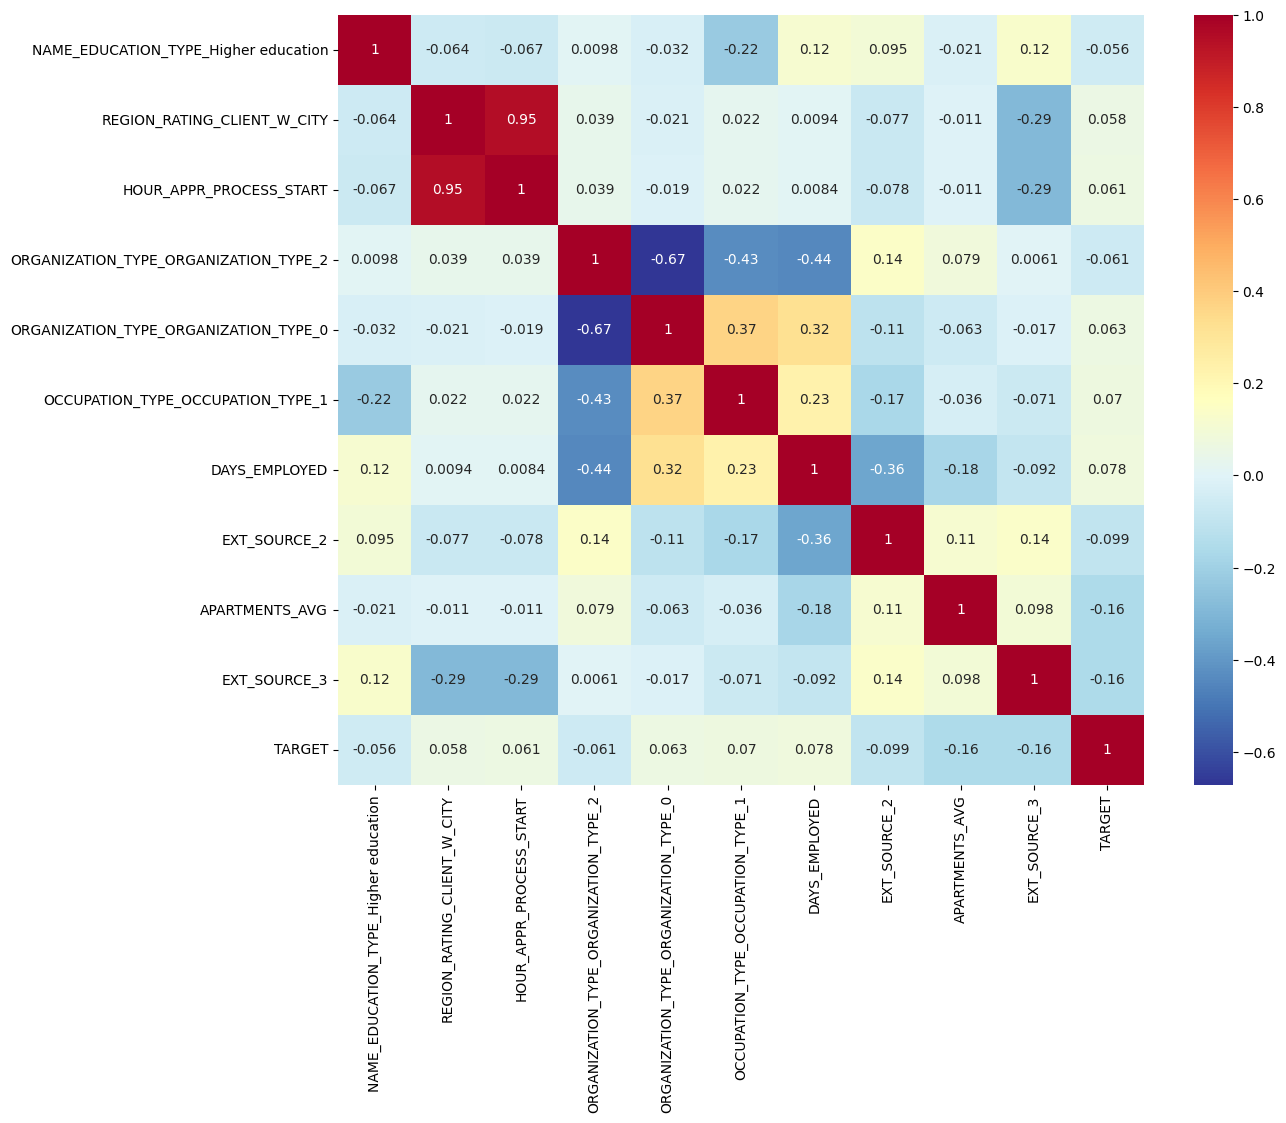

In [123]:
# Lấy ra danh sách 15 biến có tương quan lớn nhất tới biến mục tiêu theo trị tuyệt đối.
cols_corr_15 = np.abs(corr_tbl_train['TARGET']).sort_values()[-11:].index.tolist()

# Tính ma trận hệ số tương quan
cols_tbl_15 = pd_train[cols_corr_15].corr()

# Biểu diễn trên biểu đồ heatmap
plt.figure(figsize = (13, 10))
sns.heatmap(cols_tbl_15, cmap = plt.cm.RdYlBu_r, annot = True)

<Figure size 2000x500 with 0 Axes>

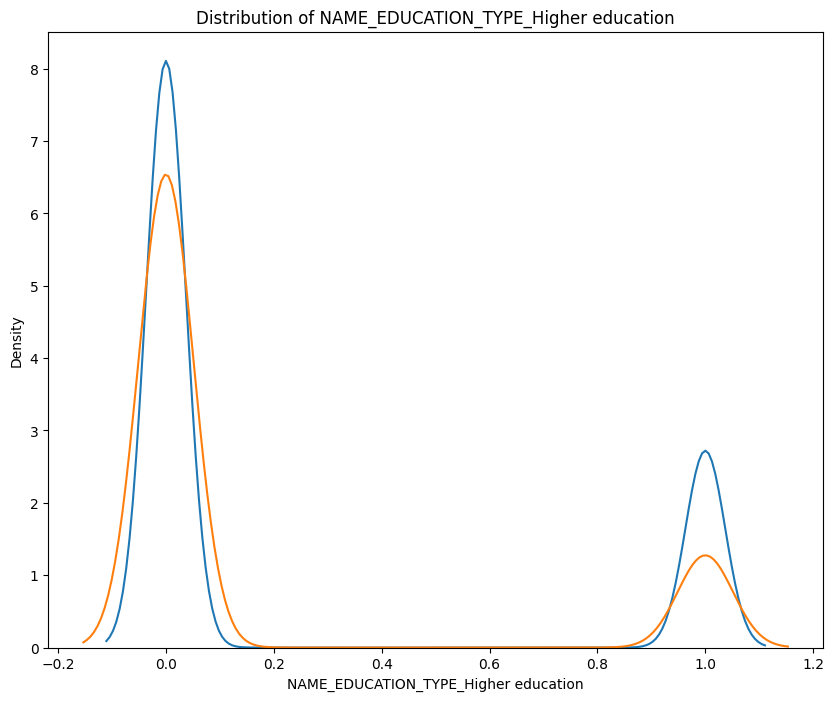

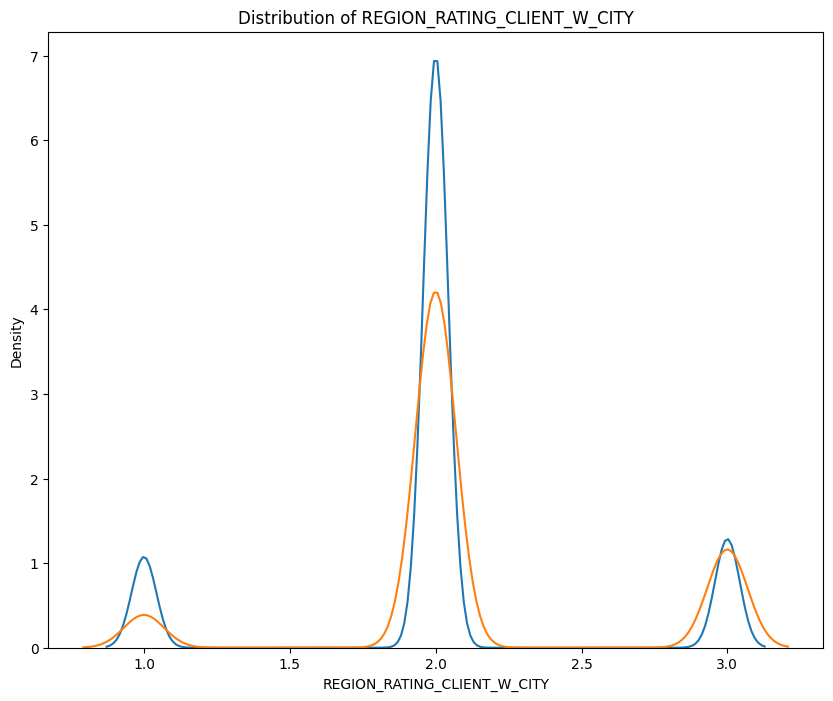

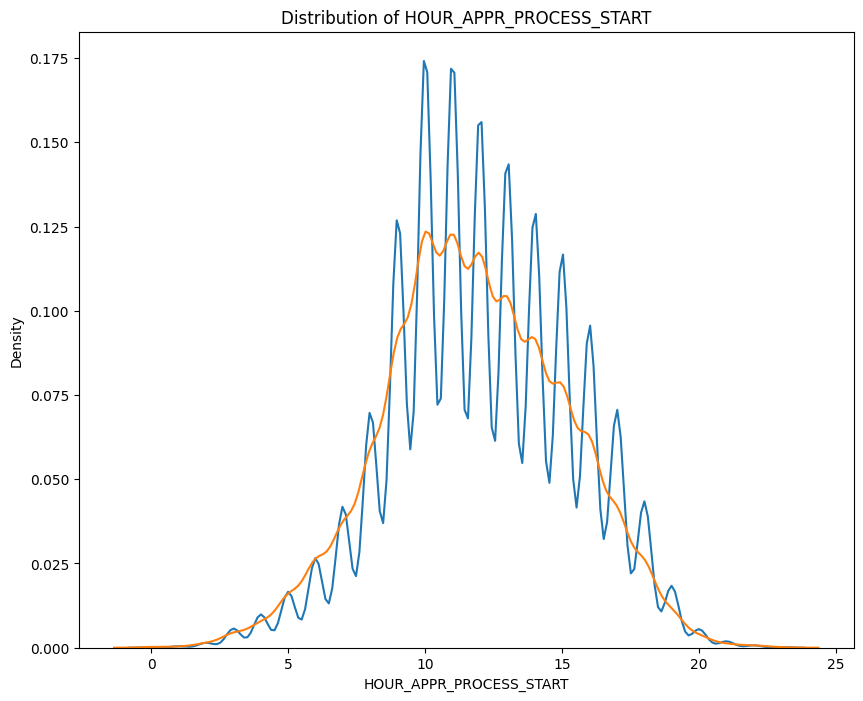

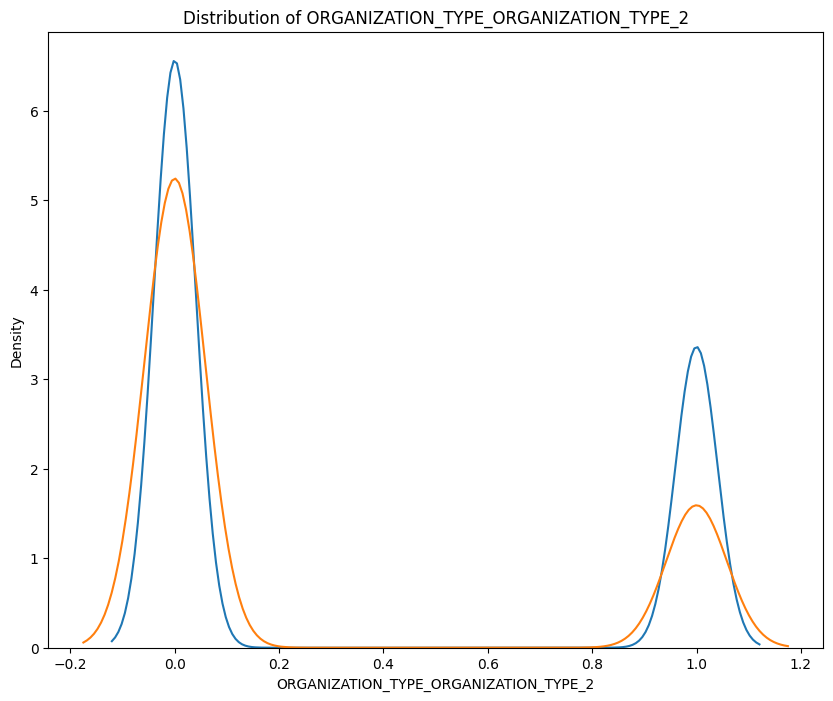

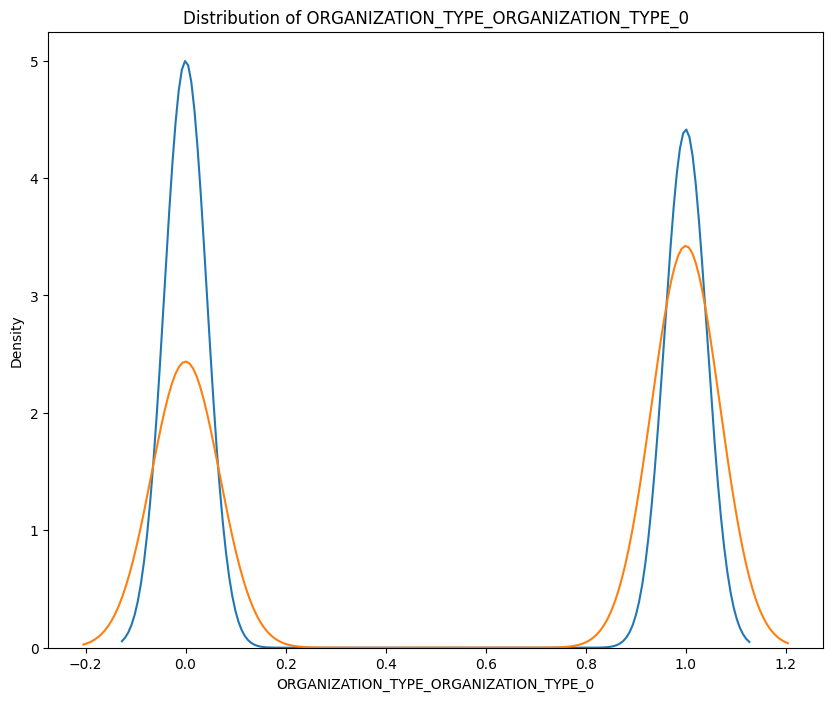

In [124]:
plt.figure(figsize = (20, 5))
for i in range(5):
    _plot_density(cols_corr_15[i])

In [125]:
age_bin = app_train[['TARGET', 'DAYS_BIRTH']]
age_bin['YEAR_OLD'] = -app_train['DAYS_BIRTH']/365

# Phân chia khoảng tuổi thanh 10 khoảng bằng nhau
age_bin['DAYS_BIN'] = pd.cut(age_bin['YEAR_OLD'], bins = np.linspace(20, 70, num = 11))
age_bin.head()

C:\Users\nn200\AppData\Local\Temp\ipykernel_30624\1808087557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_bin['YEAR_OLD'] = -app_train['DAYS_BIRTH']/365
C:\Users\nn200\AppData\Local\Temp\ipykernel_30624\1808087557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_bin['DAYS_BIN'] = pd.cut(age_bin['YEAR_OLD'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEAR_OLD,DAYS_BIN
0,0,-16765,45.931507,"(45.0, 50.0]"
1,0,-19005,52.068493,"(50.0, 55.0]"
2,0,-19932,54.608219,"(50.0, 55.0]"
3,0,-16941,46.413699,"(45.0, 50.0]"
4,0,-18850,51.643836,"(50.0, 55.0]"


In [126]:
age_bin.groupby(['DAYS_BIN']).mean()

C:\Users\nn200\AppData\Local\Temp\ipykernel_30624\3411651552.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin.groupby(['DAYS_BIN']).mean()


,TARGET,DAYS_BIRTH,YEAR_OLD
DAYS_BIN,,,
"(20.0, 25.0]",0.124009,-8532.664917,23.377164
"(25.0, 30.0]",0.111557,-10155.047837,27.822049
"(30.0, 35.0]",0.102045,-11853.509209,32.475368
"(35.0, 40.0]",0.088879,-13708.826719,37.558429
"(40.0, 45.0]",0.078780,-15497.591047,42.459154
"(45.0, 50.0]",0.075446,-17323.275616,47.461029
"(50.0, 55.0]",0.066702,-19197.510778,52.595920
"(55.0, 60.0]",0.055748,-20984.759016,57.492490
"(60.0, 65.0]",0.052246,-22776.998947,62.402737


C:\Users\nn200\AppData\Local\Temp\ipykernel_30624\765301380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin.groupby(['DAYS_BIN']).mean()['TARGET'].plot.barh(color = 'b')


Text(0.5, 0, 'Not Repaid rate')

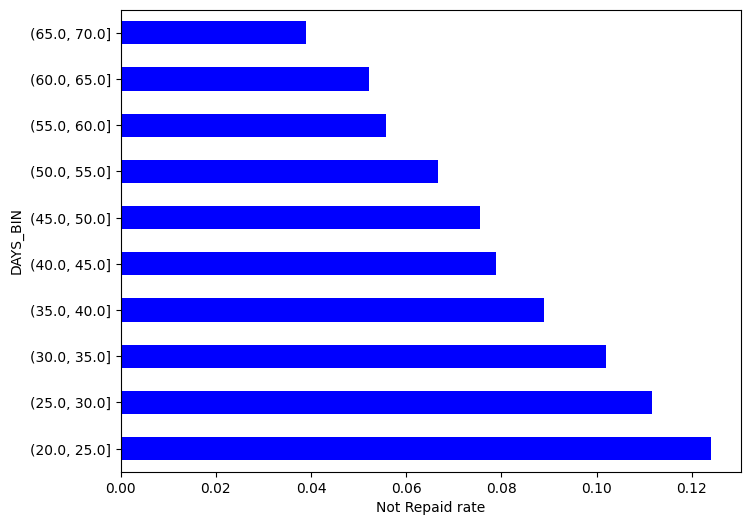

In [127]:
plt.figure(figsize = (8, 6))
age_bin.groupby(['DAYS_BIN']).mean()['TARGET'].plot.barh(color = 'b')
plt.xticks()
plt.xlabel('Not Repaid rate')

In [128]:
from sklearn.linear_model import LogisticRegression

# Xây dựng mô hình logistic với tham số kiểm soát C = 0.0001
log_reg = LogisticRegression(C = 0.0001)

# Huấn luyện mô hình
log_reg.fit(train, TARGET)

LogisticRegression(C=0.0001)

In [129]:
train_pred_prob = log_reg.predict_proba(train)[:, 1]

In [130]:
TARGET.value_counts()/TARGET.value_counts().sum()

TARGET
0    0.919206
1    0.080794
Name: count, dtype: float64

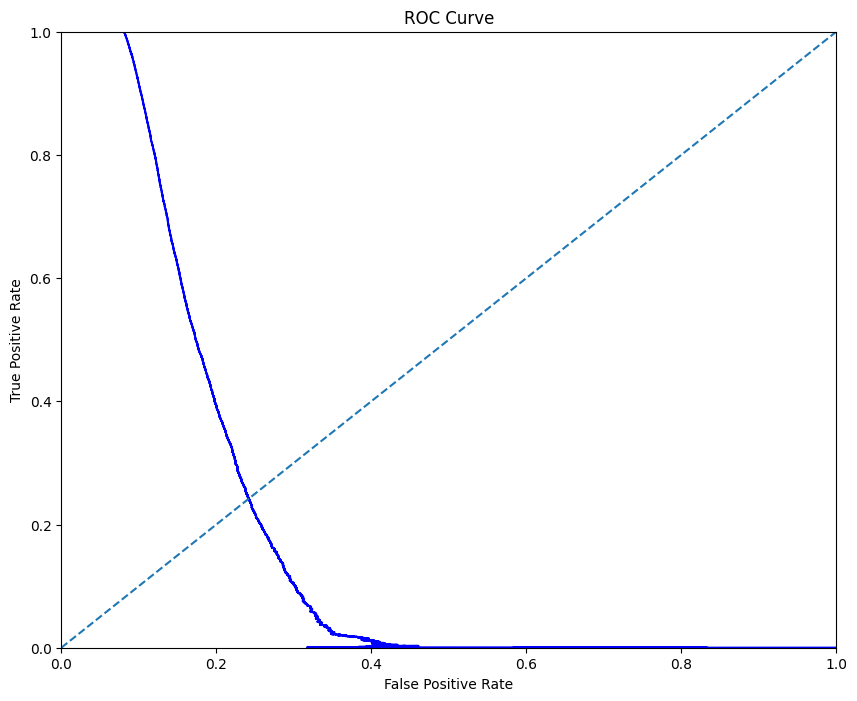

In [131]:
from sklearn.metrics import roc_curve, precision_recall_curve
fpr, tpr, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_roc_curve(fpr, tpr, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres)

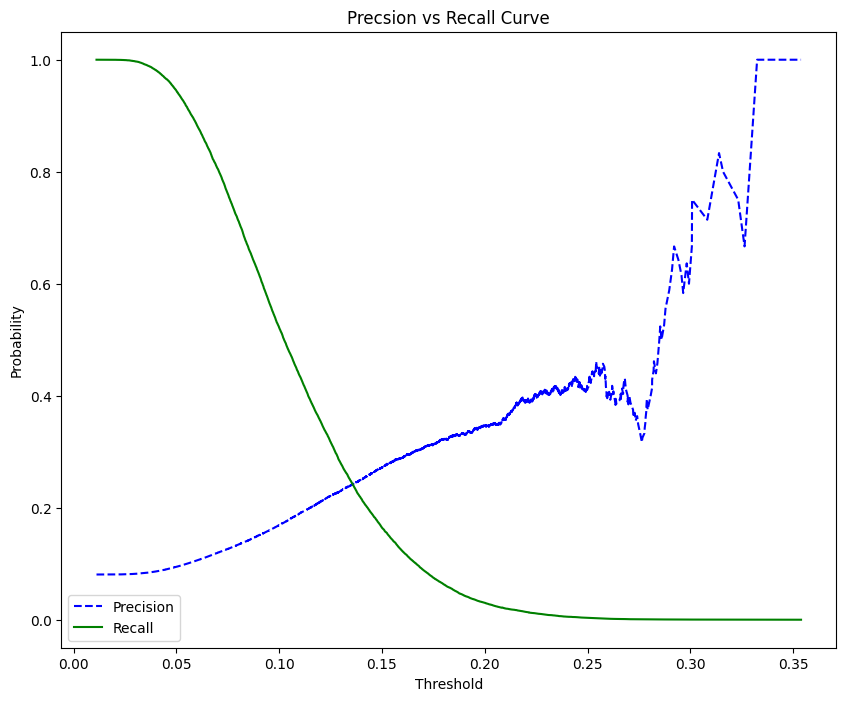

In [132]:
from sklearn.metrics import precision_recall_curve
prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(prec, rec, thres)

In [133]:
print(cols_corr_15)

['NAME_EDUCATION_TYPE_Higher education', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_2', 'ORGANIZATION_TYPE_ORGANIZATION_TYPE_0', 'OCCUPATION_TYPE_OCCUPATION_TYPE_1', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'APARTMENTS_AVG', 'EXT_SOURCE_3', 'TARGET']


In [138]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.impute import SimpleImputer

# Khởi tạo các preprocessing. Inputer theo mean, MinMaxScaler theo khoảng 0, 1 và PolynomialFeatures bậc 3.
inputer = SimpleImputer(strategy='mean')  # Sử dụng SimpleImputer thay vì Imputer (đã bị loại bỏ)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
poly_engineer = PolynomialFeatures(degree=2)

# Lấy các feature có tương quan lớn nhất đến biến mục tiêu từ app_train và app_test
TARGET = app_train[cols_corr_15[-1]]
train_poly_fea = app_train[cols_corr_15[:-1]]
test_poly_fea = app_test[cols_corr_15[:-1]]

# Điền dữ liệu missing
train_poly_fea = inputer.fit_transform(train_poly_fea)
test_poly_fea = inputer.transform(test_poly_fea)

# MinMaxScaler dữ liệu
train_poly_fea = minmax_scaler.fit_transform(train_poly_fea)
test_poly_fea = minmax_scaler.transform(test_poly_fea)

# Tạo thêm các đặc trưng đa thức
train_poly_fea = poly_engineer.fit_transform(train_poly_fea)
test_poly_fea = poly_engineer.transform(test_poly_fea)

print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)


train_poly_fea shape:  (246009, 66)
test_poly_fea shape:  (61502, 66)


In [ ]:
# Polynormial features dữ liệu
poly_engineer = poly_engineer.fit(train_poly_fea)
train_poly_fea = poly_engineer.transform(train_poly_fea)
test_poly_fea = poly_engineer.transform(test_poly_fea)

print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

train_poly_fea shape:  (246009, 2278)
test_poly_fea shape:  (61502, 2278)


In [143]:
from sklearn.linear_model import LogisticRegression

# Xây dựng mô hình hồi qui logistic với tham số kiểm soát là C = 0.0001
lg_reg = LogisticRegression(C = 0.0001)
lg_reg.fit(train_poly_fea, TARGET)
lg_reg

LogisticRegression(C=0.0001)

In [144]:
# Dự báo xác xuất logistic
train_pred_prob = lg_reg.predict_proba(train_poly_fea)[:, 1]

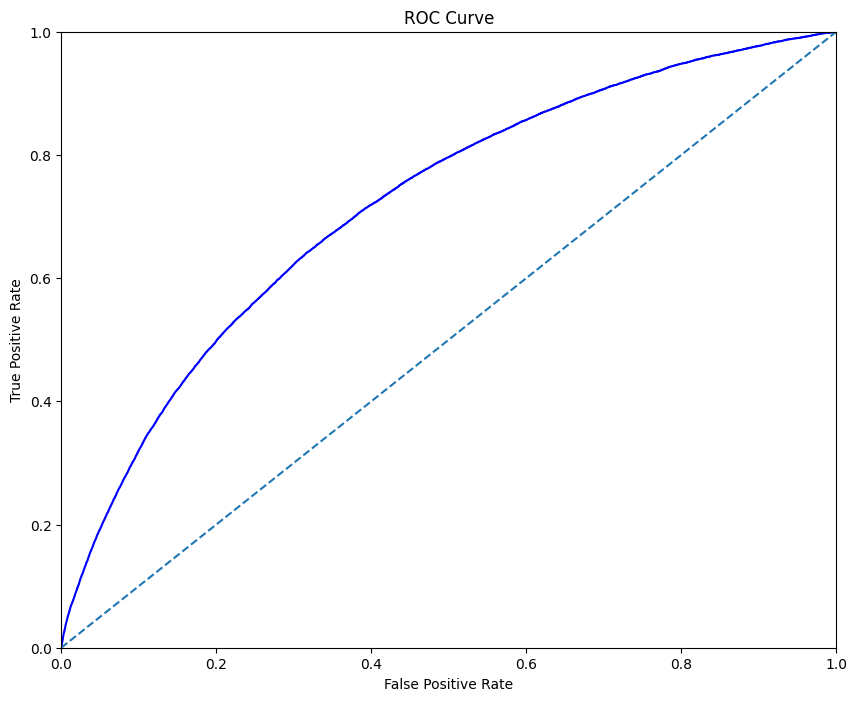

In [145]:
# Biểu diễn đường roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(TARGET, train_pred_prob)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    return roc

# Lưu biểu đồ vào p1
p1 = _plot_roc_curve(fpr, tpr, thres)

In [146]:
from sklearn.metrics import auc
#0.7127599620726505
auc(fpr, tpr)

0.7184438061447581

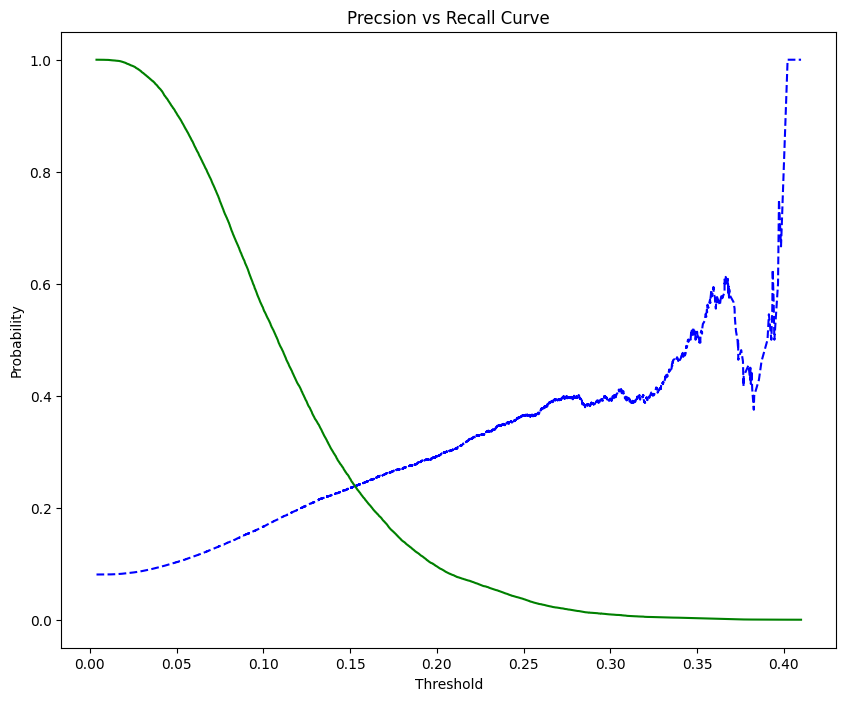

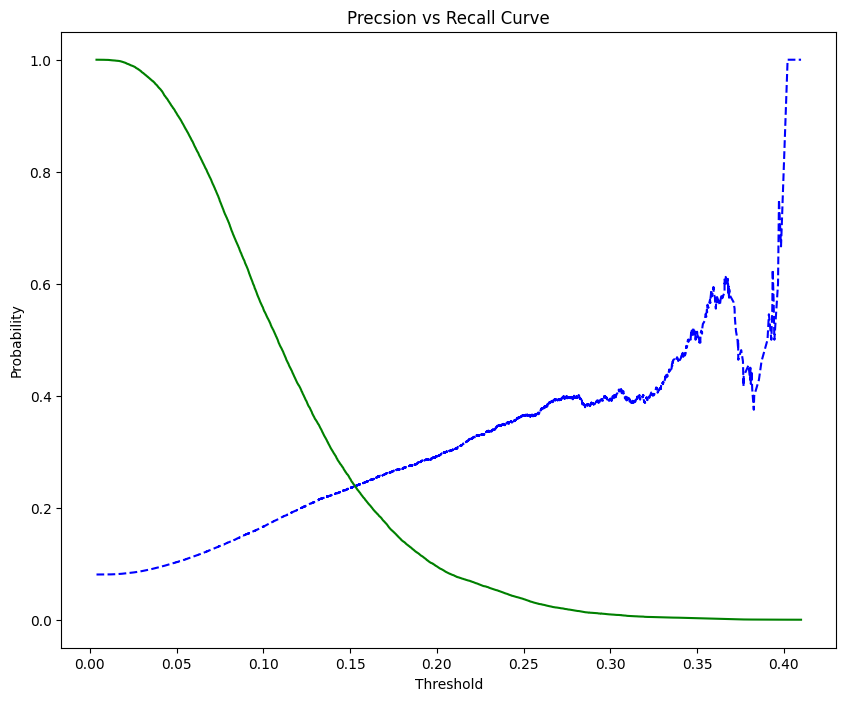

In [147]:
from sklearn.metrics import precision_recall_curve, accuracy_score

prec, rec, thres = precision_recall_curve(TARGET, train_pred_prob)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    return plot_pr

_plot_prec_rec_curve(prec, rec, thres)

In [148]:
# Accuracy
train_pred_label = lg_reg.predict(train_poly_fea)
accuracy_score(TARGET, train_pred_label)

0.9192062079029629

In [154]:
test_pred_label = lg_reg.predict(test_poly_fea)

In [158]:
app_train.shape

(246009, 176)

In [ ]:
app_test['TARGET'] = test_pred_label

In [160]:
app_test['TARGET'].value_counts()

TARGET
0    61502
Name: count, dtype: int64